# European Call Options

In [ ]:
p = 0.2 # probability of success, assumed to be unknown

### Amplitude Estimation

Defining Bernouli Circuit A and Q

    - Circuit A is defined to get a Bernouli random variable
    - Circuit Q is defined to a apply the Grover operator.
        - Grover operator is the actual estimation   part of it. Basically gets the best possible outcome based on amplitude. 
    

### How European Call Options work

Classical implementation gets the difference between strike price and spot price if it is positive as the payoff. 

Quantum Algo does the same but quantum.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

from qiskit import QuantumCircuit
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit.circuit.library import LinearAmplitudeFunction
from qiskit_aer.primitives import Sampler
from qiskit_finance.circuit.library import LogNormalDistribution

### Log-normal random distribution into quantum state

Look at qiskit implementation on their website for [Log Normal Distribution](https://qiskit.org/documentation/stable/0.25/stubs/qiskit.circuit.library.LogNormalDistribution.html). More text is supported from this [article](https://qiskit.org/documentation/stable/0.25/stubs/qiskit.circuit.library.LogNormalDistribution.html), really good it highlights how they actually got the expression.

In the presentation I can talk about this stuff.

In [4]:
#uncertainty qubits
uncertainty_qubits = 3

#parameters for distribution, WILL CHANGE FOR SITUATION
S = 2.0 # initial spot price
vol = 0.4 # volatility of 40%
r = 0.05 # annual interest rate of 4%
T = 40 / 365 # 40 days to maturity  

# parameters for how we are modeling the distribution
mu = (r - 0.5 * vol**2) * T + np.log(S)
sigma = vol * np.sqrt(T)
mean = np.exp(mu + sigma**2/2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu+sigma**2)
stddev = np.sqrt(variance)

#lowest and highest value considered for spot price
low = np.maximum(0, mean - 3 * stddev)
high = mean + 3 * stddev

#This contructs an operator that will be used for Quantum Amplitude Estimation
#This is essentially the circuit A I talked about earlier.
uncertainty_model = LogNormalDistribution(
    uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low, high)
)


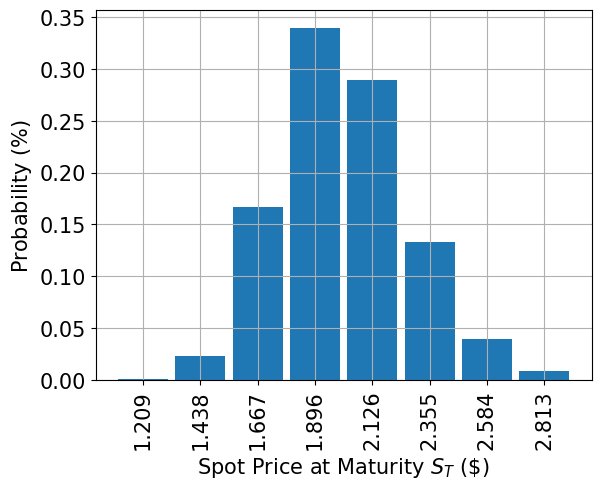

In [5]:
# plot probability distribution
x = uncertainty_model.values
y = uncertainty_model.probabilities
plt.bar(x, y, width=0.2)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel("Spot Price at Maturity $S_T$ (\$)", size=15)
plt.ylabel("Probability ($\%$)", size=15)
plt.show()